In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

# Lectura de datos

In [43]:
housing_df = pd.read_csv('housing.csv')

# Vistazo rápido a los atributos

In [44]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* La columna total_debrooms es la única que contiene valores nulos
* La columna ocean_proximity es la única no numérica, por lo que vamos a ver sus posibles valores

In [45]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Por tanto, se trata de una variable categórica. Para los atributos numéricos se puede utilizar el método describe() que nos da más información sobre los mismos.

In [46]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


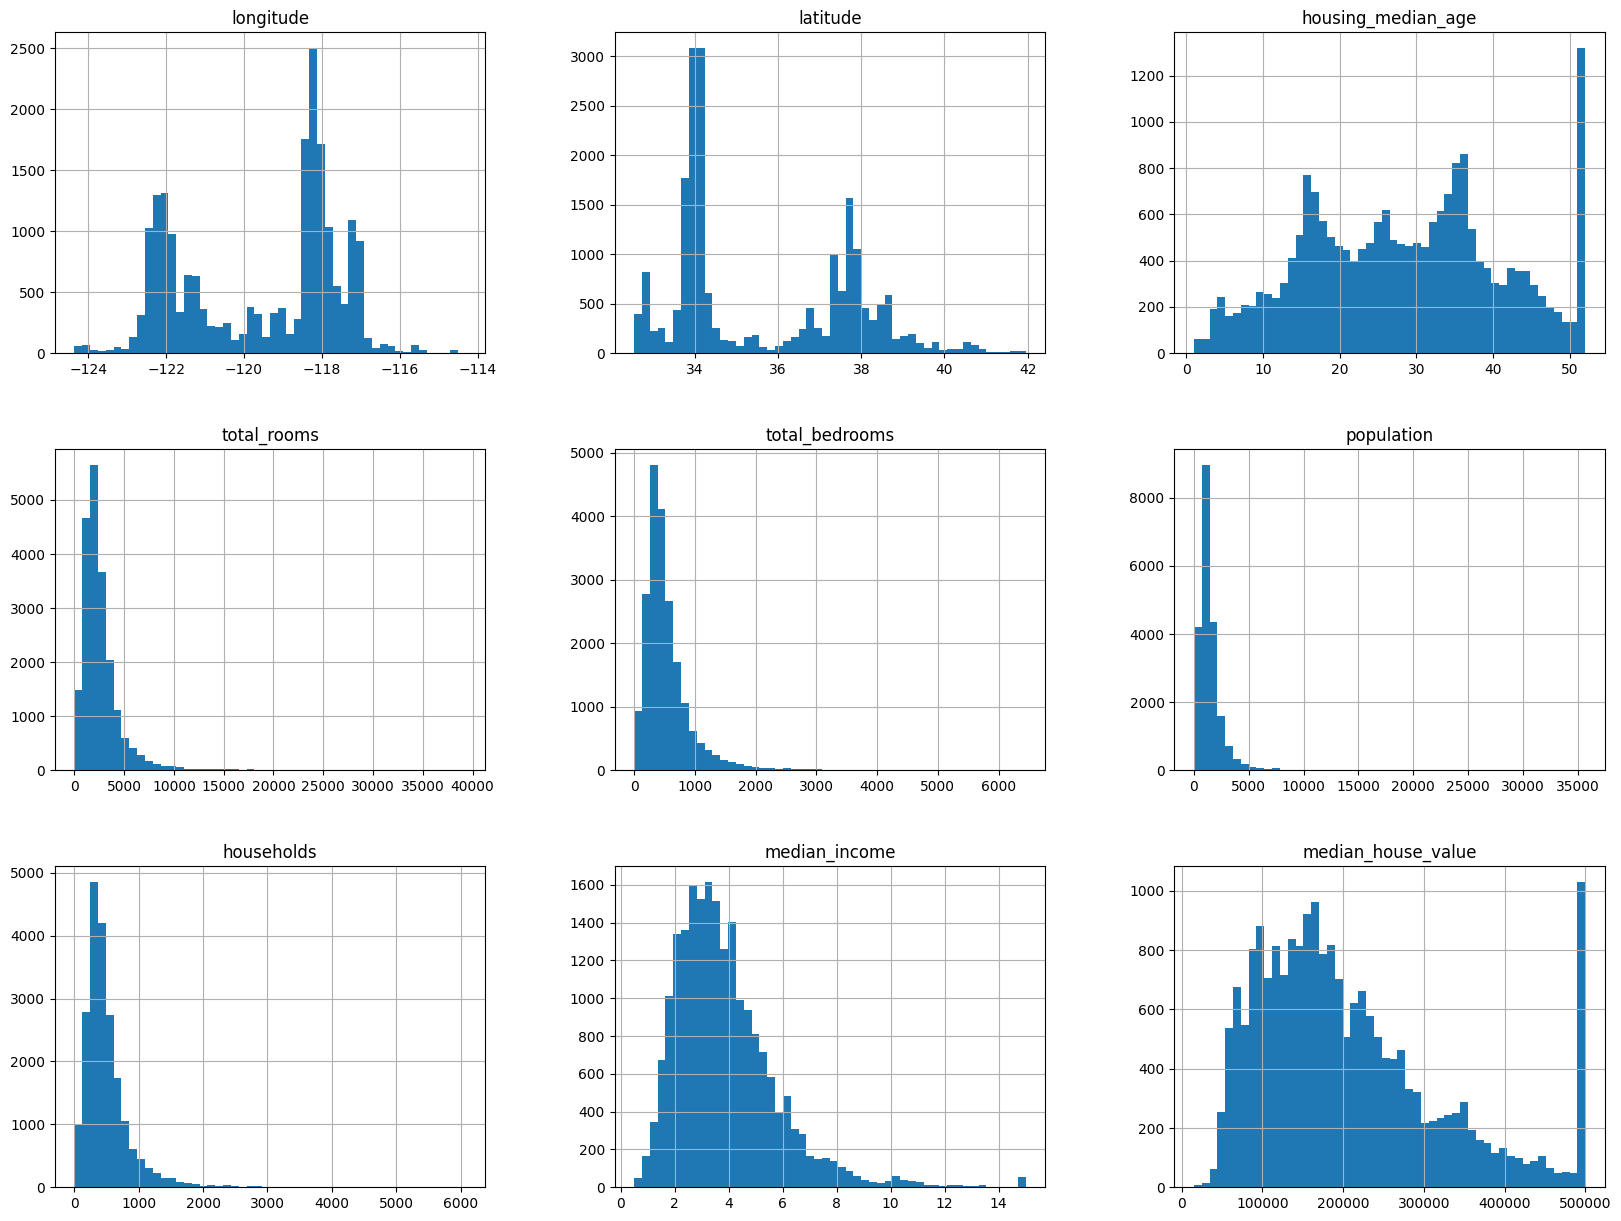

In [47]:
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

De los histogrmas de estas variables se puede sacar mucha información:

* La escala de mendian_income no parece estar directamente en dollares ya que los valores van de 0 a 15 aproximadamente. Tras consuktar la documentación del dataset se observa que los datos de este atributo está medido en miles de dolares y que los valores han sido truncados a la escala (0.49999..., 15)

* Las columnas median_house_age y median_house_value, tienen una gran cantidad de registros con valor 50 y 500000 respectivamente. Si observamos la documentación de este dataset, podemos observar que ambos atributos estan en realidad truncados, de tal forma que se incluían dentro de dichos valores todos los registros cuyo valor superaba el límite.

* Para la mayoría de columnas, el histograma hace una cola desplazada a la izquierda.

# Separación en conjuntos de train y test

Para la división en trein y test usaremos la regla de Pareto (80-20) y, como la variable objetivo se ajusta más o menos a una distribución normal, no es necesario hacer un split estratificado.

In [48]:
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

print(f"Training set: {train_set.shape}")
print(f"Test set: {test_set.shape}")

Training set: (16512, 10)
Test set: (4128, 10)


# Visualización de los datos para ganar información

## Datos geográficos

Vamos a empezar graficando los puntos geográficos que se corresponden con las ubicaciones de cada casa. Además vamos a crear una escala de color para el precio de cada casa, de tal forma que se pueda observar si existe alguna relación entre la ubicación de una casa y su precio

<Axes: xlabel='longitude', ylabel='latitude'>

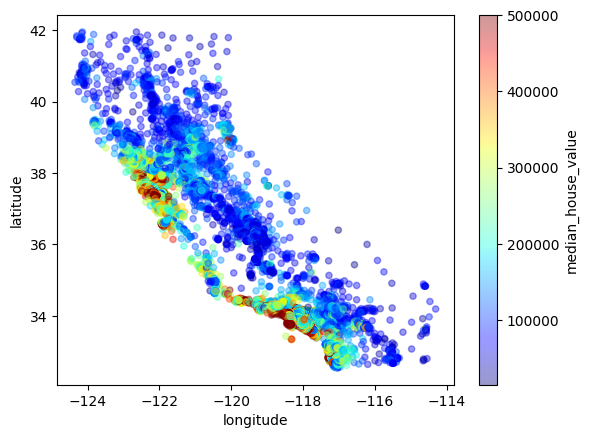

In [49]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

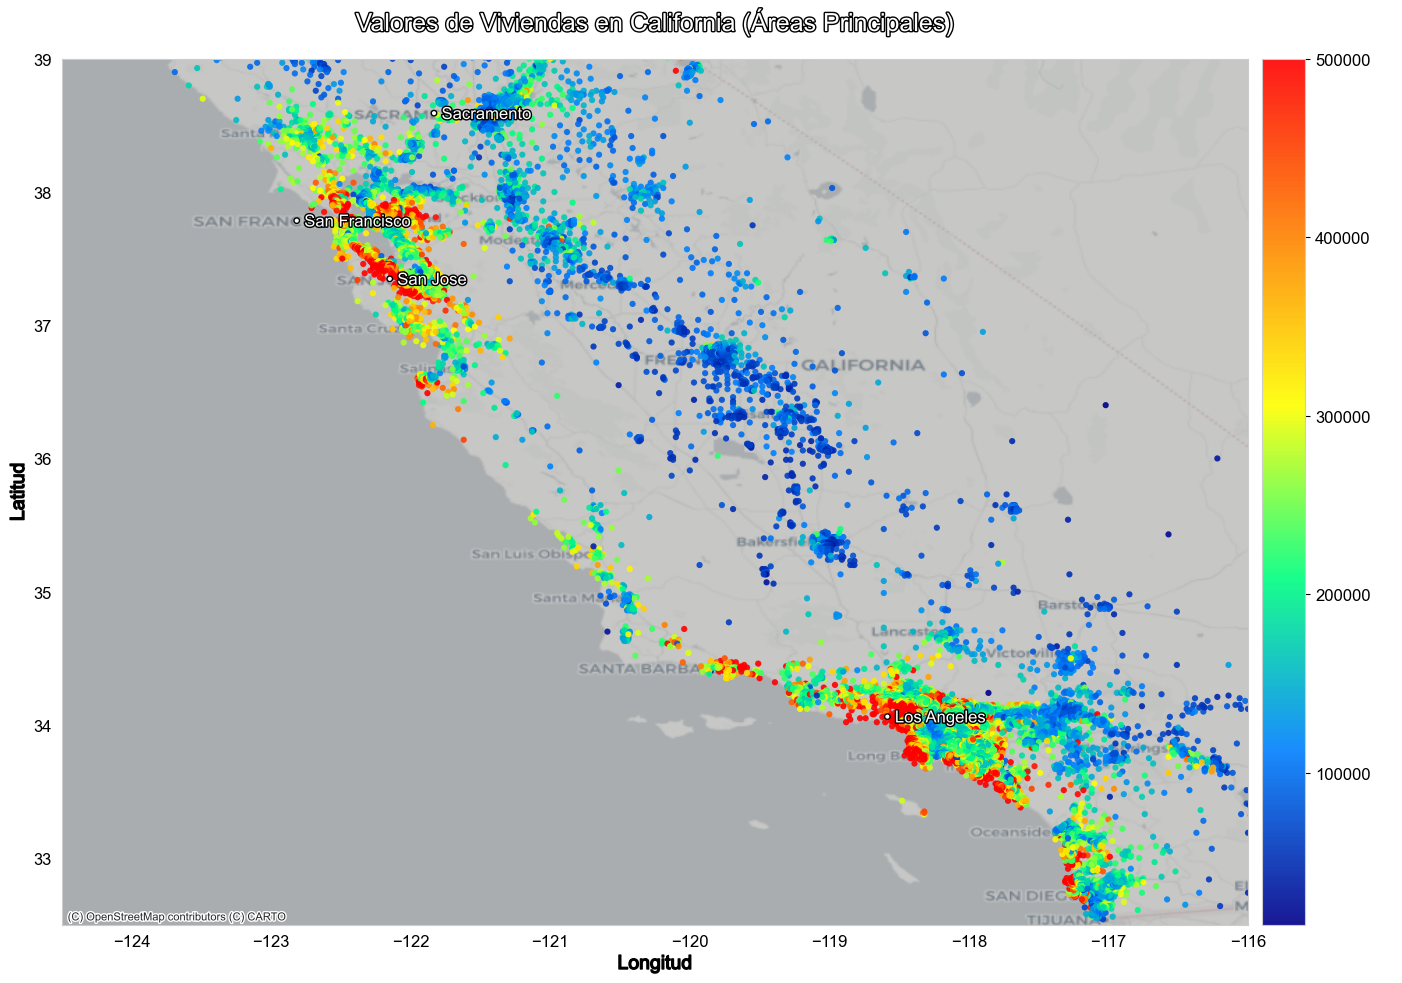

In [42]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as PathEffects
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Crear colores personalizados (del azul al rojo pasando por verde y amarillo)
colors = ['#00008B', '#0080FF', '#00FF80', '#FFFF00', '#FF8000', '#FF0000']
custom_cmap = LinearSegmentedColormap.from_list('california_prices', colors, N=256)

# Crear figura y eje con fondo negro para mejor contraste
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('#000000')

# Si quieres todos los puntos, comenta las líneas anteriores y usa esta:
plot_df = housing_df

# Scatter plot de los datos con colores vibrantes
scatter = ax.scatter(
    plot_df['longitude'], 
    plot_df['latitude'],
    c=plot_df['median_house_value'],
    cmap=custom_cmap,
    alpha=0.9,
    s=20,  # Puntos más grandes
    edgecolors='none'
)

# Añadir una barra de color personalizada
cbar = plt.colorbar(scatter, ax=ax, pad=0.01)
cbar.set_label('Valor medio de vivienda ($)', color='white', fontsize=12)
cbar.ax.yaxis.set_tick_params(color='black')
# cbar.outline.set_edgecolor('white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

# Configurar los límites del mapa con zoom en áreas principales
ax.set_xlim(-124.5, -116)  # Límites de longitud de California
ax.set_ylim(32.5, 39)      # Límites de latitud de California

# Añadir títulos y etiquetas con efectos para mejor legibilidad
title = ax.set_title('Valores de Viviendas en California (Áreas Principales)', 
                    fontsize=18, color='white', pad=20)
title.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])

xlabel = ax.set_xlabel('Longitud', fontsize=14, color='black')
ylabel = ax.set_ylabel('Latitud', fontsize=14, color='black')
xlabel.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])
ylabel.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

# Cambiar color de los ticks para que sean visibles
ax.tick_params(colors='black')

# Añadir el mapa base con muy baja opacidad para que solo sea una referencia sutil
ctx.add_basemap(
    ax,
    crs='EPSG:4326',
    source=ctx.providers.CartoDB.Positron,  # Mapa con colores suaves
    alpha=0.8  # Muy transparente
)

# Añadir anotaciones para ciudades principales
cities = {
    'San Francisco': (-122.4194, 37.7749),
    'Los Angeles': (-118.2437, 34.0522),
    'San Diego': (-117.1611, 32.7157),
    'Sacramento': (-121.4944, 38.5816),
    'San Jose': (-121.8853, 37.3382)
}

# Solo mostrar ciudades que están dentro de nuestro zoom
for city, (lon, lat) in cities.items():
    if (lon >= -123 and lon <= -117 and lat >= 34 and lat <= 39):
        txt = ax.text(lon, lat, f"• {city}", color='white', fontsize=12,
                     ha='center', va='center')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])

# Ajustar el diseño y eliminar líneas de la grilla
plt.tight_layout()
ax.grid(False)

# Guardar la imagen en alta resolución con fondo negro
plt.savefig('california_housing_enhanced.png', dpi=300, bbox_inches='tight', 
            facecolor='black', edgecolor='none')

# Mostrar el mapa
plt.show()

Si que parece que la ubicación de una casa está bastante relacionada con el precio de la misma, siendo más caras aquellas cercanas a la costa que las del interior

## Correlaciones

In [50]:
numerics = housing_df.select_dtypes(include=[np.number])
corr_matrix = numerics.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Parece ser que el ingreso promedio está bastante correlacioando con el valor de una casa. 

A continuación vamos a buscar las correlaciones más altas entre pares de atributos para ver si existen atributos que en realidad están haciendo referencia a la misma información

Top 10 highest correlated attribute pairs:
households and total_bedrooms: 0.9797
total_bedrooms and households: 0.9797
total_rooms and total_bedrooms: 0.9304
total_bedrooms and total_rooms: 0.9304
longitude and latitude: 0.9247
latitude and longitude: 0.9247
total_rooms and households: 0.9185
households and total_rooms: 0.9185
households and population: 0.9072
population and households: 0.9072


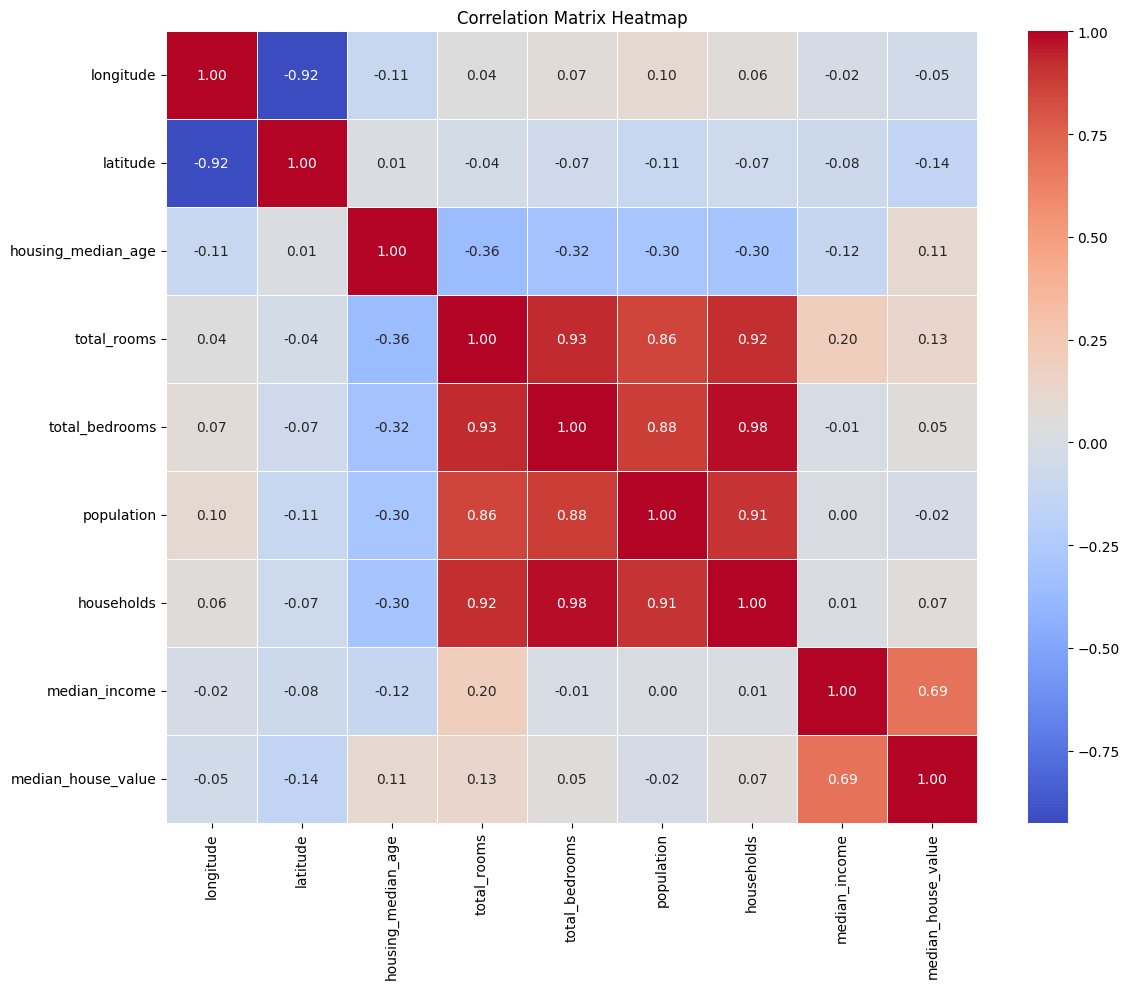

In [51]:
corr_abs = corr_matrix.abs().unstack()
corr_abs = corr_abs[corr_abs < 1]
high_correlations = corr_abs.sort_values(ascending=False)

top_10_correlations = high_correlations[:10]
print("Top 10 highest correlated attribute pairs:")
for idx, val in top_10_correlations.items():
    print(f"{idx[0]} and {idx[1]}: {val:.4f}")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Se puede observar que el número de habitaciones, numero de dormitorios, población en el bloque censal y número de hogares están muy correlacionados entre sí.

## Probando combinaciones de atributos

A continuación vamos a probar varias combinaciones de atributos para observar si estas nuevas combinaciones están correlacionadas con la variable objetivo.

In [52]:
rooms_per_household = housing_df["total_rooms"] / housing_df["households"]
housing_df["rooms_per_household"] = rooms_per_household
bedrooms_per_room = housing_df["total_bedrooms"] / housing_df["total_rooms"]
housing_df["bedrooms_per_room"] = bedrooms_per_room
bedrooms_per_household = housing_df["total_bedrooms"] / housing_df["households"]
housing_df["bedrooms_per_household"] = bedrooms_per_household
population_per_household = housing_df["population"] / housing_df["households"]
housing_df["population_per_household"] = population_per_household
numerics = housing_df.select_dtypes(include=[np.number])
corr_matrix = numerics.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


# Preparación de los datos

## Separación en datos y etiquetas

In [53]:
train_data = train_set.drop("median_house_value", axis=1)
train_labels = train_set["median_house_value"].copy()
test_data = test_set.drop("median_house_value", axis=1)
test_labels = test_set["median_house_value"].copy()

## Tratamiento de valores nulos

La única variable que tenía valores nulos es total_bedrooms, y se trata de 207 registros de un total de más de 20 mil por lo que decidimos eliminar los registros que tuvieran esta variable nula

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Drop records with missing values in total_bedrooms
train_data = train_data.dropna(subset=['total_bedrooms'])
test_data = test_data.dropna(subset=['total_bedrooms'])

# remove all rows from 'median_house_value' that are bigger than 500000
train_data = train_data[train_data['median_house_value'] <= 500000]
test_data = test_data[test_data['median_house_value'] <= 500000]

## Creación de combinaciones de atributos

In [55]:
class CombinedAttributesAdder:
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Convert to numpy array if it's a DataFrame
        if hasattr(X, 'values'):
            X_array = X.values
        else:
            X_array = X.copy()
        
        # Now use numpy indexing on the array
        rooms_per_household = X_array[:, 3] / X_array[:, 6]  # total_rooms / households
        population_per_household = X_array[:, 5] / X_array[:, 6]  # population / households
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X_array[:, 4] / X_array[:, 3]  # total_bedrooms / total_rooms
            return np.c_[X_array, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X_array, rooms_per_household, population_per_household]

## Tratamiento de variables categóricas

In [56]:
# Define which columns are numerical and categorical
num_features = list(train_data.select_dtypes(include=[np.number]).columns)
cat_features = ['ocean_proximity']

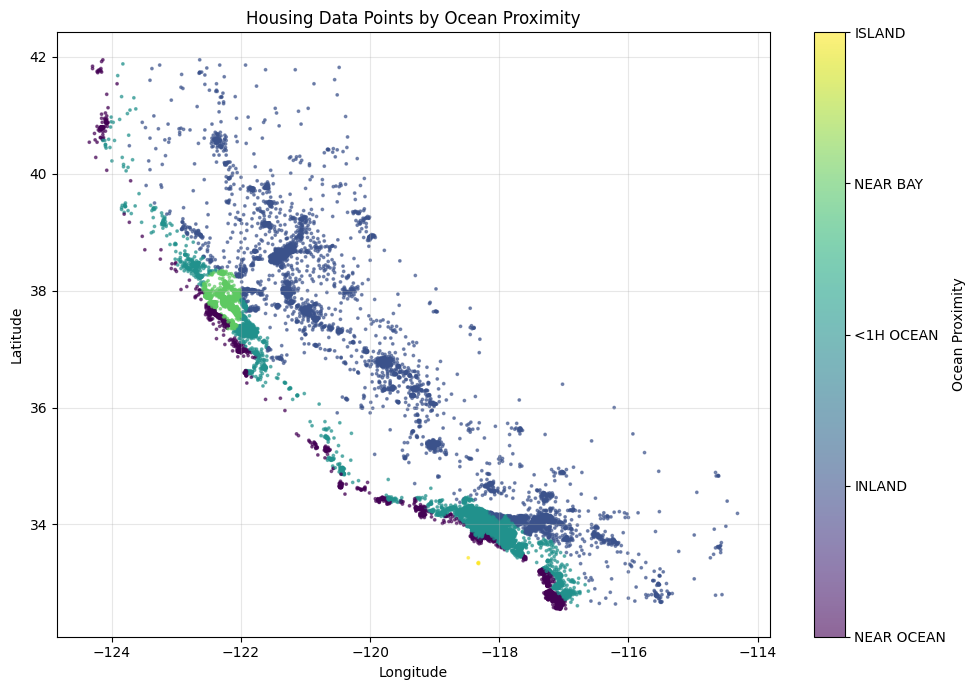

In [57]:

plt.figure(figsize=(10, 7))
scatter = plt.scatter(train_data['longitude'], train_data['latitude'], 
                     c=pd.factorize(train_data['ocean_proximity'])[0],
                     cmap='viridis', alpha=0.6, s=3)

# Add a colorbar legend
legend1 = plt.colorbar(scatter)
legend1.set_label('Ocean Proximity')
categories = train_data['ocean_proximity'].unique()
ticks = range(len(categories))
legend1.set_ticks(ticks)
legend1.set_ticklabels(categories)

plt.title('Housing Data Points by Ocean Proximity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

No se trata de una variable ordinal por lo que vamos a procesarla con un one-hot encoder

In [58]:
categorical_encoder = OneHotEncoder()

## Estandarización

Para las variables numéricas vamos a aplicar estandarización

In [59]:
std_scaler = StandardScaler()

## Aplicación del pipeline sobre los conjuntos de entrenamiento y test

In [60]:
# Create preprocessing pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', std_scaler)
])

# Create a full preprocessing pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', categorical_encoder, cat_features)
])

train_data_prepared = full_pipeline.fit_transform(train_data)
test_data_prepared = full_pipeline.transform(test_data)

print("Prepared training data shape:", train_data_prepared.shape)
print("Prepared test data shape:", test_data_prepared.shape)

Prepared training data shape: (16512, 16)
Prepared test data shape: (3921, 16)
